<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

<center>모델을 빨리 만드는 것이 목적이 아닙니다. 천천히 생각하고 정리하면서 구문을 정성껏 작성하세요.</center>

# 과제: 항공 탑승자 만족도 예측

<img src = "https://github.com/Jangrae/img/blob/master/airport2.png?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 작업에는 주석을 가능한 충분히 답니다.
- 입력을 요구한 **(작성)**, **(의견)** 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 연속형 변수를 구분하고 정규화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.

**3) 데이터 정보**

- id : 탑승자 고유 아이디
- gender: 성별 (Female, Male)
- customer_type: 고액 유형 (Loyal customer, disloyal customer)
- age: 탑승자 나이
- type_of_travel: 비행 목적(Personal Travel, Business Travel)
- class: 등급 (Business, Eco, Eco Plus)
- flight_distance: 비행 거리
- inflight_wifi_service: 와아파이 서비스 만족도 (0:N/A; 1-5)
- departure/arrival_time_convenient: 출발, 도착 시간 만족도 (0:N/A; 1-5)
- ease_of_online_booking: 온라인 부킹 만족도 (0:N/A; 1-5)
- gate_location: 게이트 위치 만족도 (0:N/A; 1-5)
- food_and_drink: 식사와 음료 만족도 (0:N/A; 1-5)
- online_boarding: 온라인 보딩 만족도 (0:N/A; 1-5)
- seat_comfort: 좌석 편안함 만족도 (0:N/A; 1-5)
- inflight_entertainment: 기내 엔터테인먼트 만족도 (0:N/A; 1-5)
- on-board_service: 온 보드 서비스 만족도 (0:N/A; 1-5)
- leg_room_service: 다리 공간 만족도 (0:N/A; 1-5)
- baggage_handling: 수하물 처리 만족도 (0:N/A; 1-5)
- check-in_service: 체크인 서비스 만족도 (0:N/A; 1-5)
- inflight_service: 기내 서비스 만족도 (0:N/A; 1-5)
- cleanliness: 청결 만족도 (0:N/A; 1-5)
- departure_delay_in_minutes: 출발 지연 시간(분)
- arrival_delay_in_minutes: 도착 지연 시간(분)
- satisfaction: 항공 만족도(1: Satisfaction, 0: Neutral or Dissatisfaction) - Target

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [35]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [164]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airline_satisfaction_small.csv'
path = 'https://bit.ly/AirlineFile'
data = pd.read_csv(path)

# 2.데이터 탐색

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [4]:
# 하위 몇 개 행 확인
data.tail()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
2575,21840,Male,Loyal Customer,63,Business travel,Business,448,2,2,2,...,4,4,5,4,3,4,4,15,8.0,1
2576,42486,Female,disloyal Customer,26,Business travel,Eco,693,3,3,3,...,3,5,5,1,1,1,3,0,0.0,0
2577,49355,Male,Loyal Customer,41,Business travel,Business,3306,5,5,5,...,5,5,5,5,2,5,2,28,24.0,1
2578,46728,Female,Loyal Customer,17,Personal Travel,Eco,125,3,2,0,...,5,4,4,3,3,3,5,0,0.0,0
2579,34516,Female,Loyal Customer,36,Personal Travel,Eco,1521,2,2,2,...,5,3,4,3,3,3,5,0,4.0,0


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2580 non-null   int64  
 1   gender                             2580 non-null   object 
 2   customer_type                      2580 non-null   object 
 3   age                                2580 non-null   int64  
 4   type_of_travel                     2580 non-null   object 
 5   class                              2580 non-null   object 
 6   flight_distance                    2580 non-null   int64  
 7   inflight_wifi_service              2580 non-null   int64  
 8   departure/arrival_time_convenient  2580 non-null   int64  
 9   ease_of_online_booking             2580 non-null   int64  
 10  gate_location                      2580 non-null   int64  
 11  food_and_drink                     2580 non-null   int64

**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [6]:
# 기초통계정보 확인
data.describe()

,id,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2574.000000,2580.000000
mean,65179.742248,39.229845,1204.824806,2.732558,3.041473,2.758527,2.973256,3.229457,3.242248,3.440310,3.329070,3.361628,3.298450,3.599225,3.318992,3.620155,3.277907,14.856202,15.285159,0.427132
std,37320.994433,15.295065,1008.852185,1.317032,1.542290,1.400792,1.271752,1.341635,1.341842,1.329681,1.334021,1.266627,1.313897,1.168210,1.256309,1.182093,1.317367,35.808534,36.301790,0.494758
min,54.000000,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32988.750000,26.000000,405.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64877.000000,40.000000,860.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97717.000000,51.000000,1754.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,13.000000,14.000000,1.000000
max,129860.000000,85.000000,4963.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,435.000000,470.000000,1.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [7]:
# 결측치 확인
data.isna().sum()

id                                   0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             6
satisfaction                         0
dtype: int64

> arrival_delay_in_minutes에 6개의 결측치 존재

**5) 상관관계 확인**

- 변수들 간의 상관관계를 확인합니다.

In [8]:
# 상관분석
data.corr()

,id,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
id,1.000000,-0.015368,0.099408,-0.027930,-0.011158,-0.006361,-0.014071,0.045138,0.031230,0.053638,0.002769,0.029071,0.041225,0.056449,0.047594,0.067987,0.038136,0.018539,-0.005068,-0.003974
age,-0.015368,1.000000,0.078047,0.010329,0.064441,0.018626,0.009466,0.034049,0.197814,0.177556,0.052257,0.026791,0.024620,-0.073139,0.050525,-0.087237,0.059583,-0.037540,-0.034144,0.115479
flight_distance,0.099408,0.078047,1.000000,0.034791,-0.002179,0.057450,0.016260,0.067810,0.233310,0.151401,0.141815,0.111265,0.143432,0.055050,0.035266,0.053794,0.096767,-0.006341,-0.025196,0.305260
inflight_wifi_service,-0.027930,0.010329,0.034791,1.000000,0.320624,0.717404,0.356636,0.115497,0.451573,0.097381,0.200623,0.129821,0.198738,0.134191,0.023225,0.103834,0.122191,0.030221,0.023121,0.259875
departure/arrival_time_convenient,-0.011158,0.064441,-0.002179,0.320624,1.000000,0.439331,0.459399,0.014700,0.059034,0.018130,0.015226,0.064172,0.035029,0.062816,0.093228,0.072874,0.025242,0.012647,0.012714,-0.059302
ease_of_online_booking,-0.006361,0.018626,0.057450,0.717404,0.439331,1.000000,0.508303,0.034033,0.384504,0.017968,0.050631,0.027163,0.138610,0.046280,-0.006889,0.032867,0.011795,0.023704,0.017871,0.158390
gate_location,-0.014071,0.009466,0.016260,0.356636,0.459399,0.508303,1.000000,-0.016628,0.019022,-0.028575,0.009760,-0.013491,0.018238,0.026451,-0.036886,-0.007018,0.000272,0.013530,0.013358,0.021243
food_and_drink,0.045138,0.034049,0.067810,0.115497,0.014700,0.034033,-0.016628,1.000000,0.239849,0.586710,0.611201,0.088740,0.030205,0.008476,0.059618,0.034685,0.642026,-0.008821,-0.013381,0.208037
online_boarding,0.031230,0.197814,0.233310,0.451573,0.059034,0.384504,0.019022,0.239849,1.000000,0.419603,0.279503,0.143723,0.145477,0.079027,0.184845,0.080524,0.329533,-0.025518,-0.034461,0.475447
seat_comfort,0.053638,0.177556,0.151401,0.097381,0.018130,0.017968,-0.028575,0.586710,0.419603,1.000000,0.599424,0.146237,0.111184,0.047997,0.170750,0.055629,0.691808,-0.027148,-0.030866,0.338773


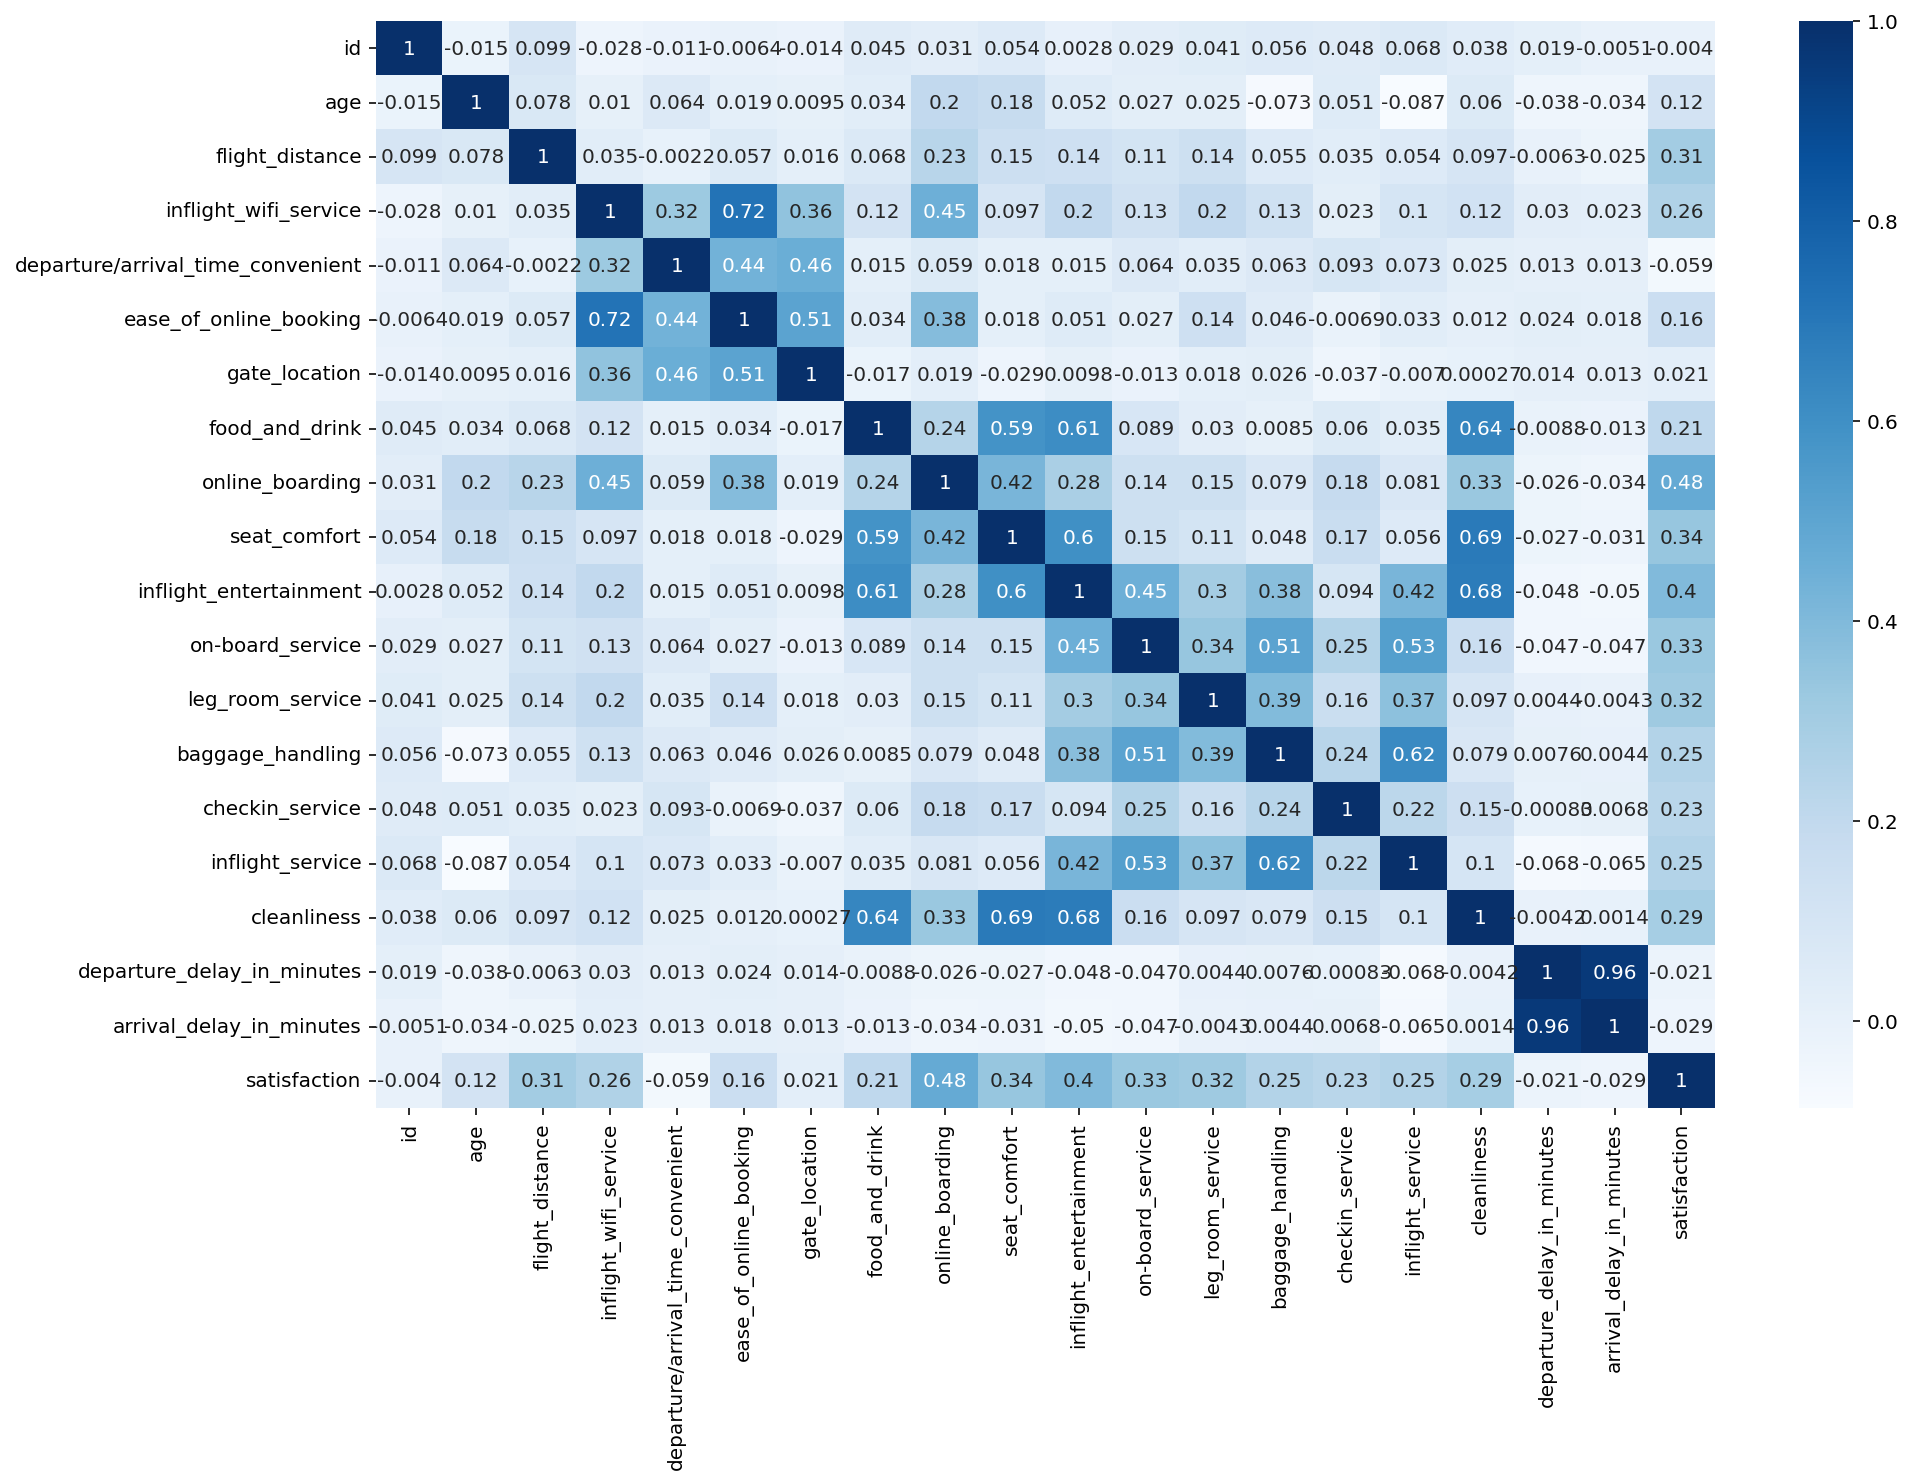

In [10]:
# 상관관계 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

**6) 범주값 변수 확인**

- 범주형 변수를 식별해 목록을 작성하고, 그 변수들이 어떤 범주값을 몇 개씩 갖는지 확인합니다.
    - 범주형 변수: gender, customer_type, type_of_travel, class, satisfaction

In [17]:
# 범주값 개수 확인
print(data['gender'].value_counts())
print('='*70)
print(data['customer_type'].value_counts())
print('='*70)
print(data['type_of_travel'].value_counts())
print('='*70)
print(data['class'].value_counts())
print('='*70)
print(data['satisfaction'].value_counts())

Female    1335
Male      1245
Name: gender, dtype: int64
Loyal Customer       2119
disloyal Customer     461
Name: customer_type, dtype: int64
Business travel    1772
Personal Travel     808
Name: type_of_travel, dtype: int64
Business    1258
Eco         1129
Eco Plus     193
Name: class, dtype: int64
0    1478
1    1102
Name: satisfaction, dtype: int64


In [14]:
# 범주별 개수 확인
col = data[['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']]
col.value_counts()

gender  customer_type      type_of_travel   class     satisfaction
Female  Loyal Customer     Business travel  Business  1               384
Male    Loyal Customer     Business travel  Business  1               380
Female  Loyal Customer     Personal Travel  Eco       0               316
Male    Loyal Customer     Personal Travel  Eco       0               282
Female  disloyal Customer  Business travel  Eco       0               124
Male    Loyal Customer     Business travel  Business  0               122
Female  Loyal Customer     Business travel  Business  0               119
Male    disloyal Customer  Business travel  Eco       0                88
Female  disloyal Customer  Business travel  Business  0                64
Male    Loyal Customer     Business travel  Eco       1                63
        disloyal Customer  Business travel  Business  0                60
        Loyal Customer     Business travel  Eco       0                58
Female  Loyal Customer     Business travel  E

**7) 주요 변수 확인**

7-1) satisfaction 변수 범주 값 개수를 막대그래프로 시각화해 확인합니다.

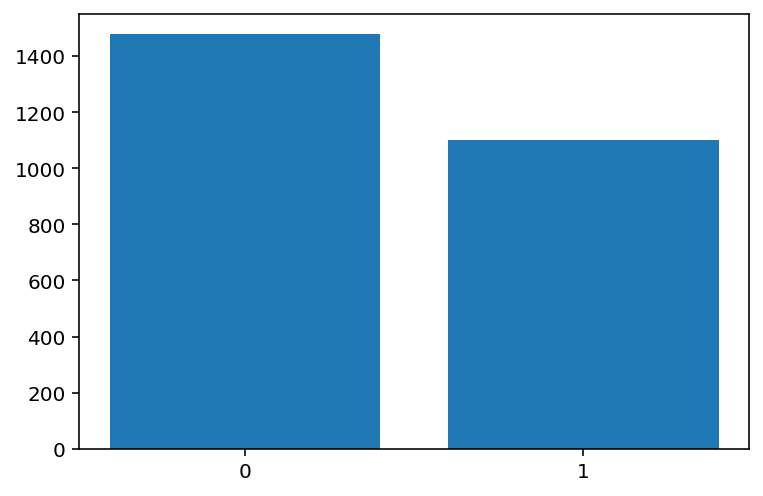

In [165]:
# satisfaction 값 분포
cnt = data['satisfaction'].value_counts()
plt.bar(cnt.index, cnt.values)
plt.xticks([0, 1])
plt.show()

- 만족도 설문에서 불만족인 경우가 많다.
- 전반적인 서비스 부분에서 점검이 필요해보인다. 세부적인 만족도에서 낮은 부분을 차지하고 있는 항목의 점수를 올려야 할 필요가 보인다.

7-2) type_of_travel 변수 범주 값  개수를 막대그래프로 시각화해 확인합니다.

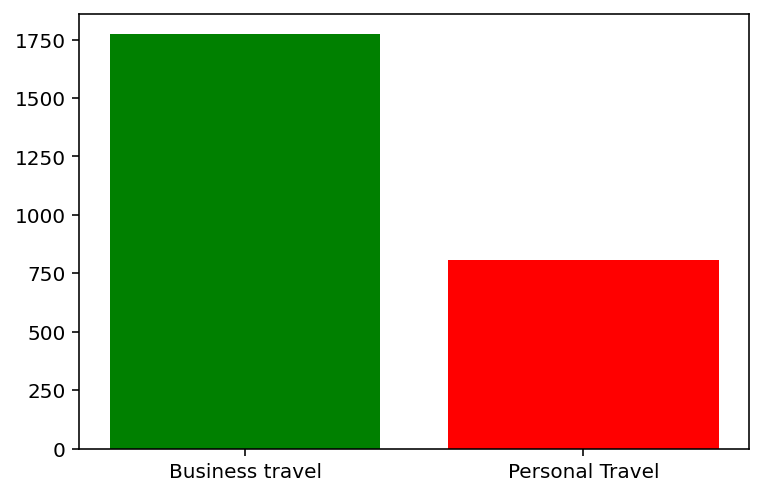

In [166]:
# type_of_travel 값 분포
cnt = data['type_of_travel'].value_counts()
plt.bar(cnt.index, cnt.values, color = ['g','r'])
# plt.xticks([0, 1])
plt.show()

- 여행의 종류 중 Business travel가 약 2/3를 차지한다.
- 이 항공사의 타겟 고객층이 Business travel인지 점검해본다.

7-3) age 변수 값 분포를 히스토그램으로 시각화해 확인합니다.

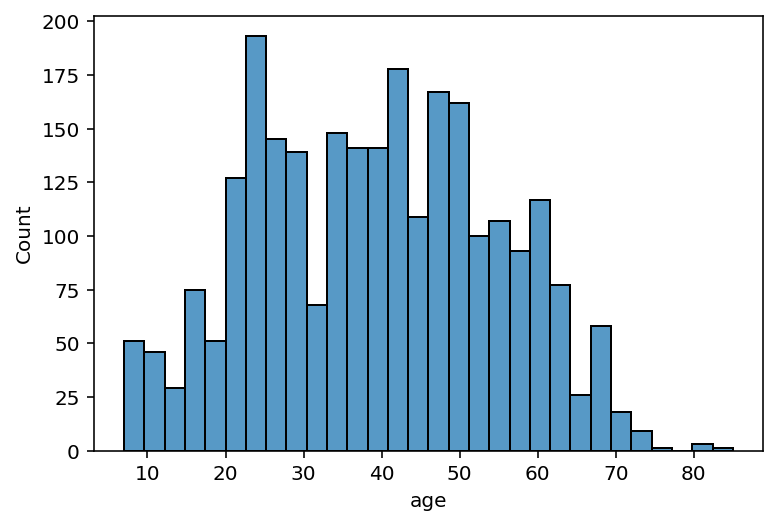

In [167]:
# age 값 분포
sns.histplot(x=data['age'], data=data, bins = 30)
plt.show()

- 위에서 여행 종류 중 비즈니스 여행이 많이 차지해서 이 항공사의 이용 연령층 20-50대가 주를 이룬다.
- 10-20대, 60대 이상은 개인적인 여행 목적일 것이다.

# 3.데이터 준비


- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 불필요한 변수 제거**

- 불필요한 변수와 의미가 적어 보이는 다음 변수들을 제거합니다.
    - id, departure/arrival_time_convenient, gate_location, departure_delay_in_minutes

In [168]:
# id 변수 제거
col_x = ['id', 'departure/arrival_time_convenient', 'gate_location', 'departure_delay_in_minutes']
data.drop(col_x, axis=1, inplace=True)

# 확인
data.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1


**2) 결측치 처리**

- arrival_delay_in_minutes 열에 결측지가 있습니다.
- 몇 건 안되니 결측치가 있는 행은 제거합니다.

In [169]:
# 결측치 제거
data.dropna(axis=0, inplace=True)

# 확인
data['arrival_delay_in_minutes'].isna().sum()

0

**3) 가변수화**

- 왜 x의 다음 변수들이 가변수화 대상이 되는지 파악한 후 가변수화를 진행합니다.
    - gender, customer_type, type_of_travel, class

In [170]:
# 가변수화
col_n = ['gender', 'customer_type', 'type_of_travel', 'class']
data = pd.get_dummies(data, columns=col_n)

# 확인
data.head()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,...,satisfaction,gender_Female,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,class_Business,class_Eco,class_Eco Plus
0,13,460,3,3,5,3,5,5,4,3,...,0,0,1,1,0,0,1,0,0,1
1,25,235,3,3,1,3,1,1,1,5,...,0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,5,5,5,5,4,3,...,1,1,0,1,0,1,0,1,0,0
3,25,562,2,5,2,2,2,2,2,5,...,0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,4,5,5,3,3,4,...,1,0,1,1,0,1,0,1,0,0


**4) x, y 분리**

- satisfaction 변수가 Target입니다.
- x, y가 분리된 이후부터 y는 절대로 건드지지 않아야 합니다.

In [171]:
# target 확인
target = 'satisfaction'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**5) 정규화**

- x의 모든 변수를 정규화합니다.

In [172]:
# 정규화
x = (x - x.min())/(x.max()-x.min())

# 확인
x.head()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,...,arrival_delay_in_minutes,gender_Female,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,class_Business,class_Eco,class_Eco Plus
0,0.076923,0.080270,0.6,0.6,1.0,0.6,1.00,1.0,0.8,0.6,...,0.038298,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.230769,0.034314,0.6,0.6,0.2,0.6,0.00,0.2,0.2,1.0,...,0.012766,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.243590,0.219567,0.4,0.4,1.0,1.0,1.00,1.0,0.8,0.6,...,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.230769,0.101103,0.4,1.0,0.4,0.4,0.25,0.4,0.4,1.0,...,0.019149,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.692308,0.030025,0.6,0.6,0.8,1.0,1.00,0.6,0.6,0.8,...,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


**5) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [173]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 각각의 성능을 확인합니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.
- 각 알고리즘별로 요구되는 내용을 숙지하면서 모델링을 진행합니다.

## 4.1.KNN

### 4.1.1. 모델링

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [64]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [66]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [67]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [68]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[424  19]
 [ 58 272]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       443
           1       0.93      0.82      0.88       330

    accuracy                           0.90       773
   macro avg       0.91      0.89      0.90       773
weighted avg       0.90      0.90      0.90       773



### 4.1.2. 성능 정보 수집

- 모델 각각의 성능을 모아 마지막에 비교하기 위해 아래 구문을 수행해 성능 정보를 score 변수에 저장합니다.

In [69]:
# 성능 정보 수집
from sklearn.metrics import accuracy_score

score={}
score['KNN'] = accuracy_score(y_test, y_pred)

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [70]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier

In [78]:
# 2단계: 선언하기
model = DecisionTreeClassifier(random_state=2022)

In [79]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [80]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [81]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[398  45]
 [ 47 283]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       443
           1       0.86      0.86      0.86       330

    accuracy                           0.88       773
   macro avg       0.88      0.88      0.88       773
weighted avg       0.88      0.88      0.88       773



### 4.2.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [82]:
# 중요도 확인
print(list(x))
print(model.feature_importances_)

['age', 'flight_distance', 'inflight_wifi_service', 'ease_of_online_booking', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'arrival_delay_in_minutes', 'gender_Female', 'gender_Male', 'customer_type_Loyal Customer', 'customer_type_disloyal Customer', 'type_of_travel_Business travel', 'type_of_travel_Personal Travel', 'class_Business', 'class_Eco', 'class_Eco Plus']
[3.92594268e-02 4.38975655e-02 1.54397856e-01 2.10941997e-03
 6.05152885e-03 3.42739583e-01 1.74797807e-02 6.18019013e-02
 1.21844111e-02 5.78665912e-03 4.27741900e-03 1.89904949e-02
 1.14120584e-02 2.30228410e-02 1.64546236e-02 2.27966026e-03
 2.26863340e-03 2.78615633e-02 2.45906120e-02 1.60356604e-01
 0.00000000e+00 1.94035021e-02 3.11200524e-04 3.06265509e-03]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

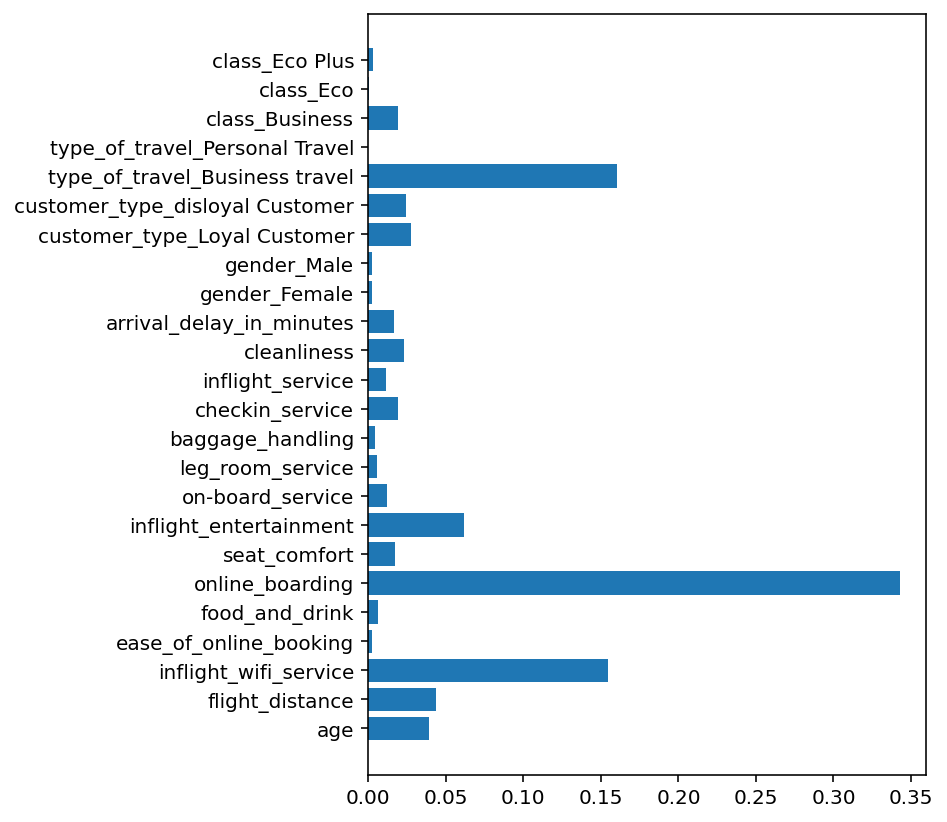

In [83]:
# 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(list(x), model.feature_importances_)
plt.show()

- online_boarding > type_of_travel_Business > inflight_wifi_service 순으로 높은 중요도를 보인다.
- 전체적인 만족도 부분에서 높은 중요도를 보인 변수는 온라인쪽으로 중요도가 높아진 것을 알 수 있다. 
- 직접적으로 받는 서비스보다 고객 스스로 온라인 서비스를 경험한 부분의 중요도가 높아보인다.

### 4.2.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [84]:
# 성능 정보 수집
score['Decision Tree'] = accuracy_score(y_test, y_pred)

## 4.3.Random Forest

### 4.3.1.모델링

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [85]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier

In [86]:
# 2단계: 선언하기
model = RandomForestClassifier(random_state=2022)

In [87]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [88]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [89]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[419  24]
 [ 35 295]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       443
           1       0.92      0.89      0.91       330

    accuracy                           0.92       773
   macro avg       0.92      0.92      0.92       773
weighted avg       0.92      0.92      0.92       773



### 4.3.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [90]:
# 중요도 확인
print(list(x))
print(model.feature_importances_)

['age', 'flight_distance', 'inflight_wifi_service', 'ease_of_online_booking', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'arrival_delay_in_minutes', 'gender_Female', 'gender_Male', 'customer_type_Loyal Customer', 'customer_type_disloyal Customer', 'type_of_travel_Business travel', 'type_of_travel_Personal Travel', 'class_Business', 'class_Eco', 'class_Eco Plus']
[0.04267016 0.05052409 0.1001233  0.0377353  0.01698177 0.14796357
 0.04826429 0.04339561 0.02913141 0.04065067 0.02449491 0.0285756
 0.02224965 0.03366194 0.02173094 0.00596186 0.00580871 0.02681813
 0.02733861 0.05835002 0.07469411 0.06302824 0.04588336 0.00396377]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

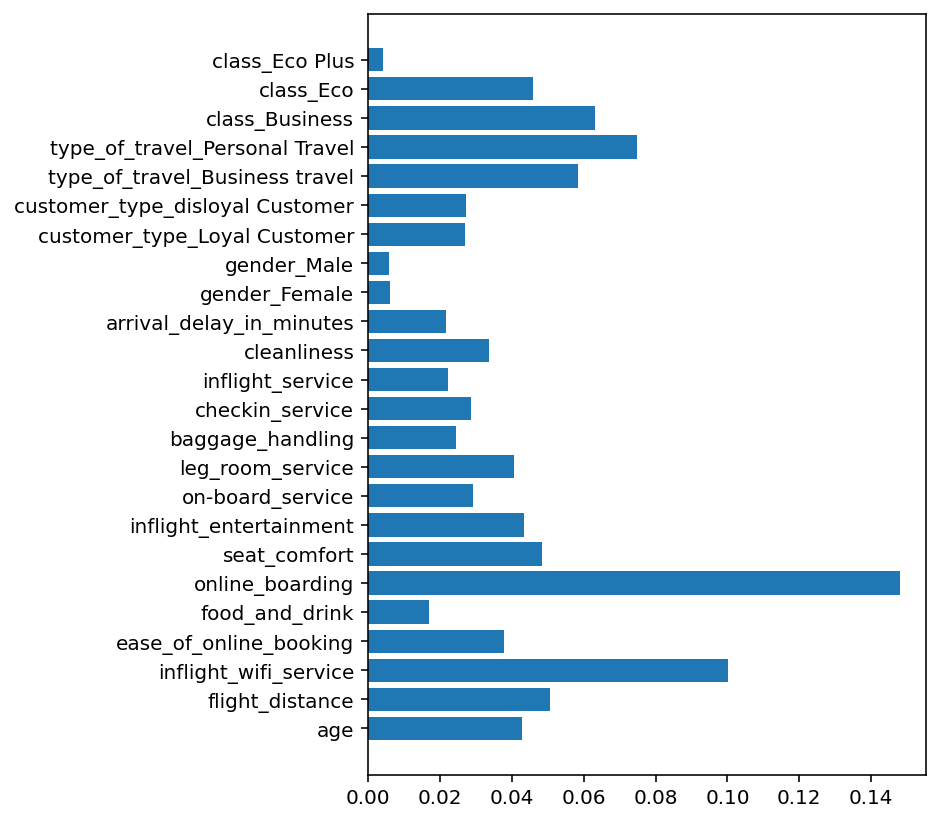

In [91]:
# 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(list(x), model.feature_importances_)
plt.show()

- online_boarding > inflight_wifi_service > type_of_travel_Business 순으로 중요도가 나타난다.
- Deicision Tree에 비해 많은 변수의 특성 중요도가 올라간 것을 확인할 수 있다.
- -> Random Forest가 기준이 되는 feature를 랜덤하게 지정하기 때문일 것이다.

### 4.3.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [92]:
# 성능 정보 수집
score['Random Forest'] = accuracy_score(y_test, y_pred)

## 4.4.XGBoost

### 4.4.1.모델링

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [93]:
# 1단계: 불러오기
from xgboost import XGBClassifier

In [94]:
# 2단계: 선언하기
model = XGBClassifier()

In [95]:
# 3단계: 학습하기
model.fit(x_train, y_train)

[13:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [98]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[419  24]
 [ 32 298]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       443
           1       0.93      0.90      0.91       330

    accuracy                           0.93       773
   macro avg       0.93      0.92      0.93       773
weighted avg       0.93      0.93      0.93       773



### 4.4.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [99]:
# 중요도 확인
print(list(x))
print(model.feature_importances_)

['age', 'flight_distance', 'inflight_wifi_service', 'ease_of_online_booking', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on-board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'arrival_delay_in_minutes', 'gender_Female', 'gender_Male', 'customer_type_Loyal Customer', 'customer_type_disloyal Customer', 'type_of_travel_Business travel', 'type_of_travel_Personal Travel', 'class_Business', 'class_Eco', 'class_Eco Plus']
[0.01271769 0.00870186 0.08635558 0.01660112 0.00903725 0.28182772
 0.02763157 0.04797981 0.02047672 0.02035984 0.02359108 0.01985148
 0.00920835 0.02751659 0.01203717 0.0095018  0.         0.07281946
 0.         0.17613226 0.         0.09817535 0.01947731 0.        ]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

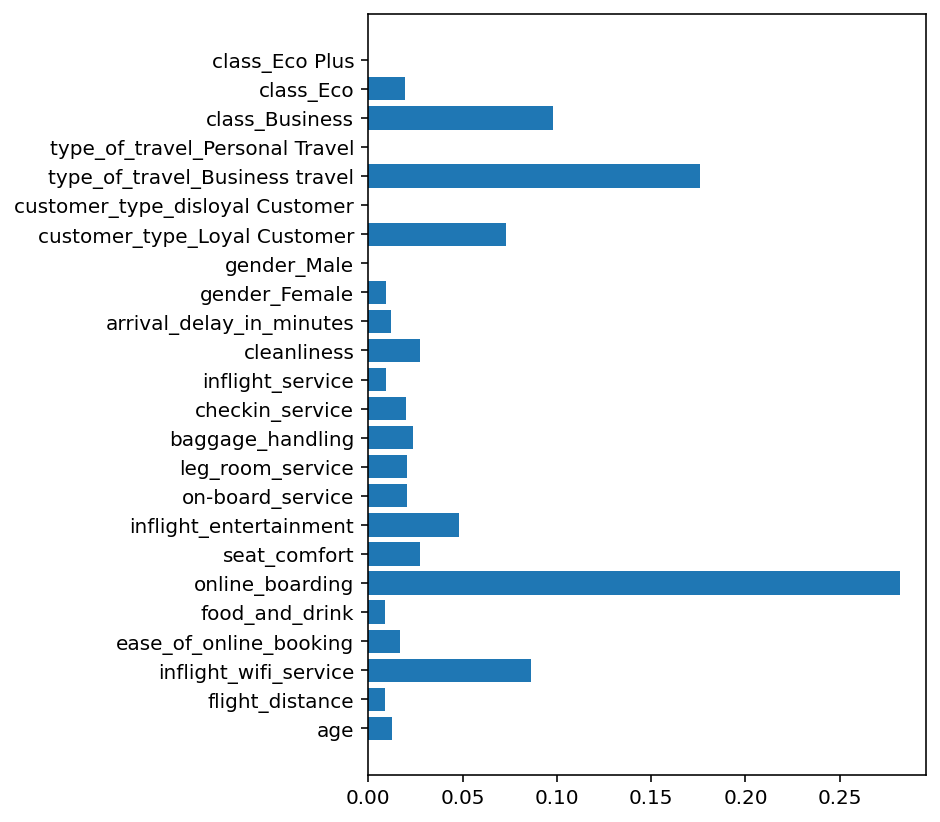

In [100]:
# 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(list(x), model.feature_importances_)
plt.show()

- online_boarding > type_of_travel_Business> class_Business > inflight_wifi_service 순으로 중요도가 나타난다.
- class_Business가 특성 중요도에서 3번째로 많이 차지하고 있다. 아무래도 이 항공사를 이용하는 다수의 고객이 비즈니스 여행이 목적이기 때문에 비즈니스 클래스를 이용하는 고객의 중요도가 높을 것이다.
- customer_type_Loyal customer의 특성 중요도도 이전 모델보다 높아진 것을 볼 수 있다. 이 항공사의 타겟층을 비즈니스 여행을 자주하는 CEO와 같은 고위급 인사들에게 맞추는 것이 필요해 보인다.

### 4.4.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [101]:
# 성능 정보 수집
score['XGBoost'] = accuracy_score(y_test, y_pred)

# 5.정리

- 앞에서 수집한 성능 정보를 시각화해 확인합니다.

-KNN: 0.9004
-Decision Tree: 0.8810
-Random Forest: 0.9237
-XGBoost: 0.9276


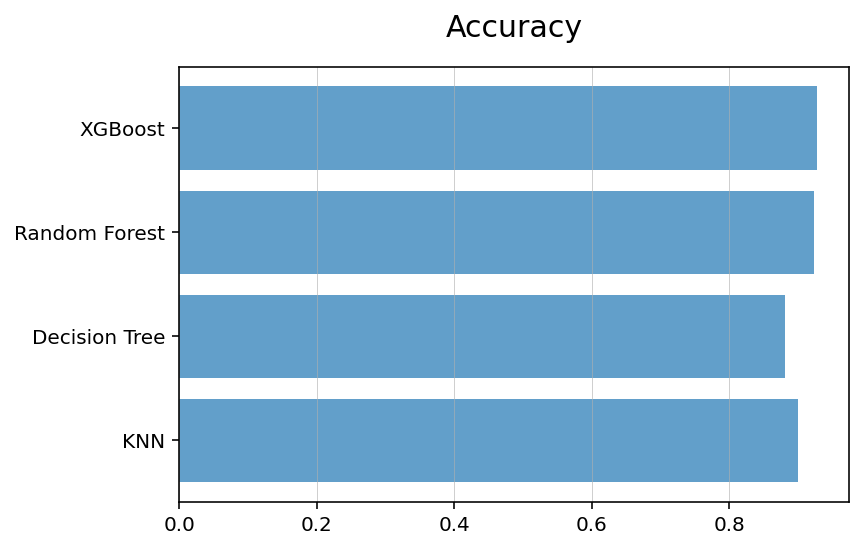

In [102]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시작화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- XGBoost > Random Forest  > KNN > Decision Tree 순으로 정확도가 높은 것을 볼 수 있다.

# 6.(옵션) 튜닝

- 마음에 드는 모델을 선택하여 튜닝을 진행합니다.

### 6.1 XGBoost

- RandomSearch

In [127]:
# 불러오기
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [128]:
# 파라미터 범위 지정
param = {'max_depth':range(1, 51),
         'n_estimators':range(10, 211, 10)}

In [129]:
# 튜닝
model_rt = XGBClassifier(random_state=2022)
model = RandomizedSearchCV(model_rt,
                           param, 
                           cv = 5,
                           n_iter=30,
                           n_jobs=-1)

In [131]:
# 학습하기
model.fit(x_train, y_train)

[14:14:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                     

In [132]:
# 확인하기
print('최적의 파라미터 :', model.best_params_)
print('최고 성능 :', model.best_score_) 

최적의 파라미터 : {'n_estimators': 50, 'max_depth': 13}
최고 성능 : 0.9433656509695292


- GridSearch

In [141]:
# 파라미터 범위 지정
param = {'max_depth':range(8, 17),
         'n_estimators':range(20, 61, 10)}

In [142]:
# 튜닝
model_rt = XGBClassifier(random_state=2022)
model = GridSearchCV(model_rt,
                    param, 
                    cv = 10,
                    n_jobs=-1)

In [143]:
# 학습하기
model.fit(x_train, y_train)

[14:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=2022, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weigh

In [144]:
# 확인하기
print('최적의 파라미터 :', model.best_params_)
print('최고 성능 :', model.best_score_) 

최적의 파라미터 : {'max_depth': 13, 'n_estimators': 30}
최고 성능 : 0.9472651933701657


- 예측 & 평가

In [145]:
# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[414  29]
 [ 31 299]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       443
           1       0.91      0.91      0.91       330

    accuracy                           0.92       773
   macro avg       0.92      0.92      0.92       773
weighted avg       0.92      0.92      0.92       773



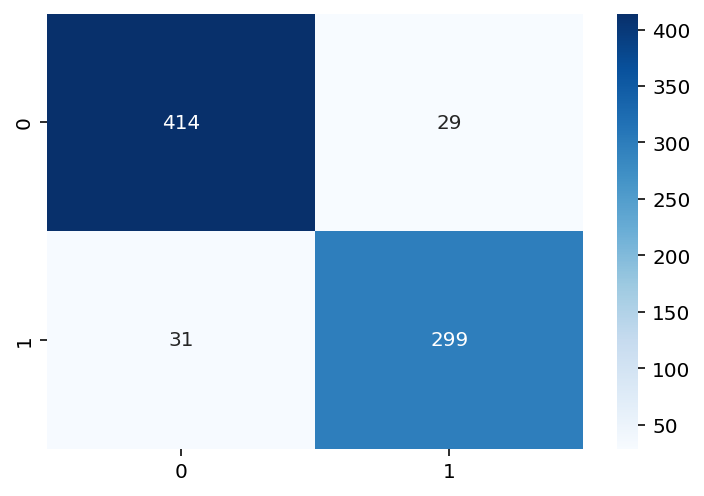

In [146]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

In [147]:
# 성능 정보 수집
score['XGBoost_Random&Grid'] = accuracy_score(y_test, y_pred)

-KNN: 0.9004
-Decision Tree: 0.8810
-Random Forest: 0.9237
-XGBoost: 0.9276
-XGBoost_Random&Grid: 0.9224


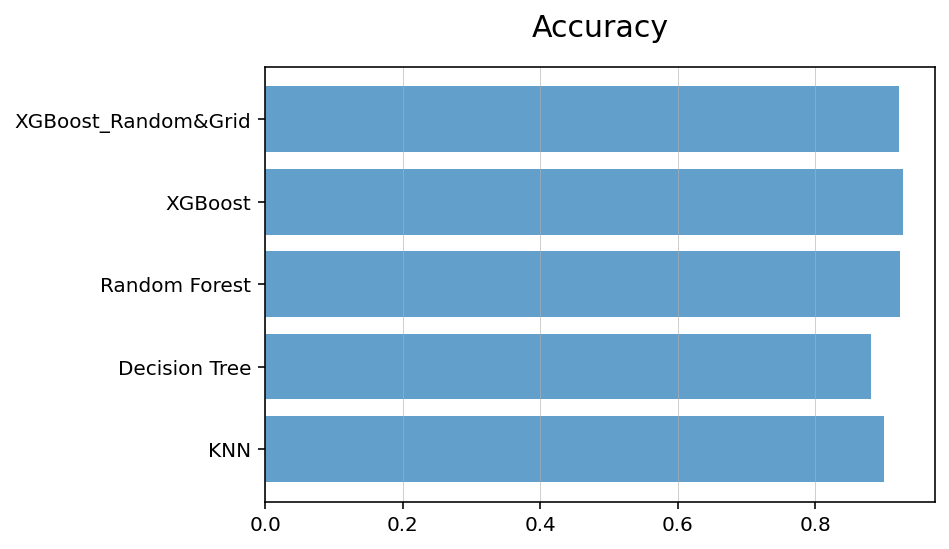

In [148]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시작화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- XGBoost의 RandomSearch, GridSearch 튜닝 결과 기본 세팅이 되어 있는 XGBoost보다 성능이 낮아진 것을 볼 수 있다. 
- 최고 정확도 92.76%로 항공 만족도의 예측 성능은 좋다고 볼 수 있다.

### 6.2 RandomForest

- RandomSerch

In [149]:
# 파라미터 범위 지정
param = {'max_depth':range(1, 51),
         'min_samples_leaf':range(1, 11),
         'min_samples_split':range(2, 11),
         'n_estimators':range(10, 211, 10)}

In [151]:
# 튜닝
model_rt = RandomForestClassifier(random_state=2022)
model = RandomizedSearchCV(model_rt,
                           param, 
                           cv = 10,
                           n_iter=30,
                           n_jobs=-1)

In [152]:
# 학습하기
model.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2022),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 51),
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11),
                                        'n_estimators': range(10, 211, 10)})

In [153]:
# 확인하기
print('최적의 파라미터 :', model.best_params_)
print('최고 성능 :', model.best_score_) 

최적의 파라미터 : {'n_estimators': 110, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 47}
최고 성능 : 0.9311663597298956


- GridSearch

In [154]:
# 파라미터 범위 지정
param = {'max_depth':range(44, 52),
         'min_samples_leaf':range(1, 6),
         'min_samples_split':range(6, 10),
         'n_estimators':range(80, 131, 10)}

In [155]:
# 튜닝
model_rt = RandomForestClassifier(random_state=2022)
model = GridSearchCV(model_rt,
                    param, 
                    cv = 10,
                    n_jobs=-1)

In [156]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2022),
             n_jobs=-1,
             param_grid={'max_depth': range(44, 52),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(6, 10),
                         'n_estimators': range(80, 131, 10)})

- 예측 & 평가

In [157]:
# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[416  27]
 [ 35 295]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       443
           1       0.92      0.89      0.90       330

    accuracy                           0.92       773
   macro avg       0.92      0.92      0.92       773
weighted avg       0.92      0.92      0.92       773



In [158]:
# 성능 정보 수집
score['RandomForest_Random&Grid'] = accuracy_score(y_test, y_pred)

-KNN: 0.9004
-Decision Tree: 0.8810
-Random Forest: 0.9237
-XGBoost: 0.9276
-XGBoost_Random&Grid: 0.9224
-RandomForest_Random&Grid: 0.9198


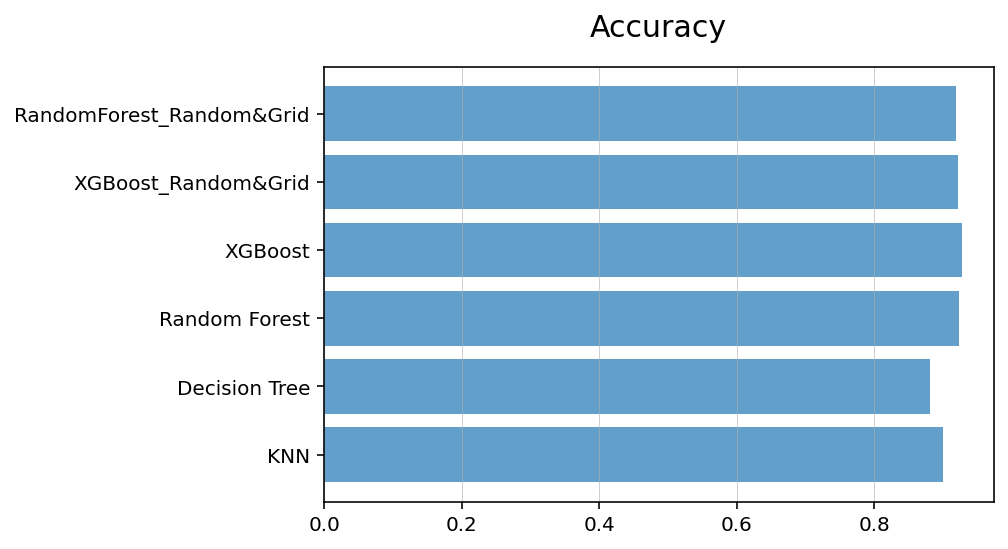

In [159]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시작화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('Accuracy', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- RandomForest도 기존으로 세팅되어있는 모델의 성능이 더 높은 것을 알 수 있다. 
- (기존 : 0.9237 -> 튜닝 : 0.9198)

---
### 결론

- 전체적인 만족도 부분에서 높은 중요도를 보인 변수는 오프라인 보다 온라인 서비스쪽으로 중요도가 높아진 것을 알 수 있다.(ex. online_boarding, inflight_wifi_service)
- 고객 여행 타입과, 고객 유형에 대한 특성 중요도도 높아보이기 때문에 이 항공사의 타겟 고객층이 무엇인지 명확히 하는 것이 필요해 보인다.
- 항공 만족도에서 불만족이 많았기 때문에 앞서 언급한 것을 우선 시행하고, 전반적인 서비스 점검이 필요해보인다.